Write a MATLAB or Python program to Purchase Classification Prediction using SVM.

In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv('/content/user-data.csv')

# Display first few rows
print("Dataset Preview:")
data.head()

Dataset Preview:


,user_id,gender,age,estimated_salary,purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
label_encoder = LabelEncoder()
categorical_cols = data.select_dtypes(include=['object']).columns

print("\nEncoding categorical columns:")
for column in categorical_cols:
    print(f"- {column}")
    data[column] = label_encoder.fit_transform(data[column])

# Show transformed data
print("\nData after encoding:")
data.head()


Encoding categorical columns:
- gender

Data after encoding:


,user_id,gender,age,estimated_salary,purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [4]:
X = data.drop(['user_id', 'purchased'], axis=1).values  # Features
y = data['purchased'].values                           # Target

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")


Feature matrix shape: (400, 3)
Target vector shape: (400,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 320 samples
Test set size: 80 samples


In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\nFeature scaling applied (StandardScaler)")


Feature scaling applied (StandardScaler)


In [7]:
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

print("SVM classifier trained successfully")

SVM classifier trained successfully


In [8]:
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2%}")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Model Accuracy: 91.25%

Confusion Matrix:
[[57  1]
 [ 6 16]]


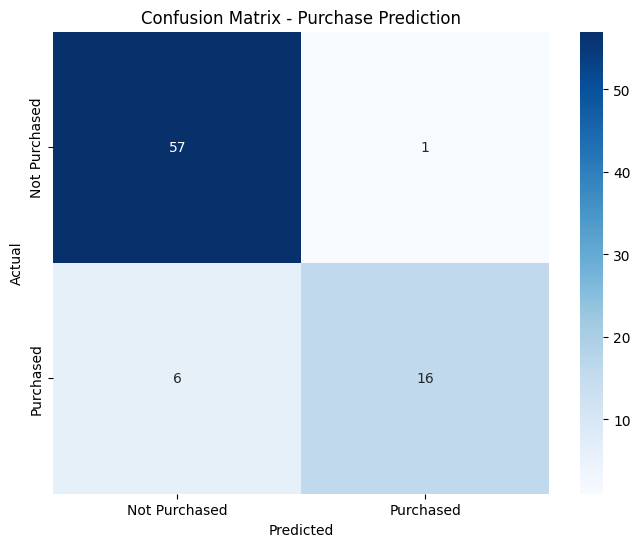

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Purchased', 'Purchased'],
            yticklabels=['Not Purchased', 'Purchased'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Purchase Prediction')
plt.show()